In [1]:
%matplotlib inline
from __future__ import division, print_function

In [2]:
from keras.layers import Activation, Dense
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
import numpy as np
from sklearn import datasets
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


In [3]:
np.random.seed(0)

In [4]:
iris = datasets.load_iris()
X = iris.data
labels = iris.target

In [5]:
random_indices = np.random.permutation(len(X))
print('X:', X[random_indices[:10]], 'labels:', labels[random_indices[:10]], sep='\n')

X:
[[ 5.8  2.8  5.1  2.4]
 [ 6.   2.2  4.   1. ]
 [ 5.5  4.2  1.4  0.2]
 [ 7.3  2.9  6.3  1.8]
 [ 5.   3.4  1.5  0.2]
 [ 6.3  3.3  6.   2.5]
 [ 5.   3.5  1.3  0.3]
 [ 6.7  3.1  4.7  1.5]
 [ 6.8  2.8  4.8  1.4]
 [ 6.1  2.8  4.   1.3]]
labels:
[2 1 0 2 0 2 0 1 1 1]


In [6]:
Y = to_categorical(labels)

In [7]:
print(Y[random_indices[:10]])

[[ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]]


In [8]:
random_indices = np.random.permutation(len(X))
train_indices = random_indices[:len(X)//2]
test_indices = random_indices[len(X)//2:]

In [9]:
X_train, X_test = X[train_indices], X[test_indices]
Y_train, Y_test = Y[train_indices], Y[test_indices]
labels_train, labels_test = labels[train_indices], labels[test_indices]

ロジスティック回帰

In [10]:
model = Sequential()
model.add(Dense(3, input_dim=4))
model.add(Activation('softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(X_train, Y_train, nb_epoch=200, batch_size=128)

Epoch 1/200
75/75 [==============================] - 0s - loss: 1.8246 - acc: 0.3600
Epoch 2/200
75/75 [==============================] - 0s - loss: 1.8188 - acc: 0.3600
Epoch 3/200
75/75 [==============================] - 0s - loss: 1.8123 - acc: 0.3600
Epoch 4/200
75/75 [==============================] - 0s - loss: 1.8055 - acc: 0.3600
Epoch 5/200
75/75 [==============================] - 0s - loss: 1.7985 - acc: 0.3600
Epoch 6/200
75/75 [==============================] - 0s - loss: 1.7915 - acc: 0.3600
Epoch 7/200
75/75 [==============================] - 0s - loss: 1.7845 - acc: 0.3600
Epoch 8/200
75/75 [==============================] - 0s - loss: 1.7775 - acc: 0.3600
Epoch 9/200
75/75 [==============================] - 0s - loss: 1.7705 - acc: 0.3600
Epoch 10/200
75/75 [==============================] - 0s - loss: 1.7636 - acc: 0.3600
Epoch 11/200
75/75 [==============================] - 0s - loss: 1.7568 - acc: 0.3600
Epoch 12/200
75/75 [==============================] - 0s - loss

In [12]:
labels_pred = model.predict_classes(X_test, verbose=0)
print(confusion_matrix(labels_test, labels_pred))
print(classification_report(labels_test, labels_pred))

[[ 0 28  0]
 [ 0  0 24]
 [ 0  0 23]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        28
          1       0.00      0.00      0.00        24
          2       0.49      1.00      0.66        23

avg / total       0.15      0.31      0.20        75



/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


多層パーセプトロン

In [13]:
model = Sequential()
model.add(Dense(16, input_dim=4))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(16))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(3))
model.add(BatchNormalization())
model.add(Activation('softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(X_train, Y_train, nb_epoch=200, batch_size=128)

Epoch 1/200
75/75 [==============================] - 0s - loss: 1.6102 - acc: 0.2000
Epoch 2/200
75/75 [==============================] - 0s - loss: 1.5754 - acc: 0.2133
Epoch 3/200
75/75 [==============================] - 0s - loss: 1.5362 - acc: 0.2667
Epoch 4/200
75/75 [==============================] - 0s - loss: 1.4950 - acc: 0.2667
Epoch 5/200
75/75 [==============================] - 0s - loss: 1.4541 - acc: 0.2933
Epoch 6/200
75/75 [==============================] - 0s - loss: 1.4138 - acc: 0.2933
Epoch 7/200
75/75 [==============================] - 0s - loss: 1.3742 - acc: 0.3200
Epoch 8/200
75/75 [==============================] - 0s - loss: 1.3357 - acc: 0.3333
Epoch 9/200
75/75 [==============================] - 0s - loss: 1.2981 - acc: 0.3867
Epoch 10/200
75/75 [==============================] - 0s - loss: 1.2607 - acc: 0.4133
Epoch 11/200
75/75 [==============================] - 0s - loss: 1.2237 - acc: 0.4267
Epoch 12/200
75/75 [==============================] - 0s - loss

In [15]:
labels_pred = model.predict_classes(X_test, verbose=0)
print(confusion_matrix(labels_test, labels_pred))
print(classification_report(labels_test, labels_pred))

[[28  0  0]
 [ 0 23  1]
 [ 0  0 23]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        28
          1       1.00      0.96      0.98        24
          2       0.96      1.00      0.98        23

avg / total       0.99      0.99      0.99        75



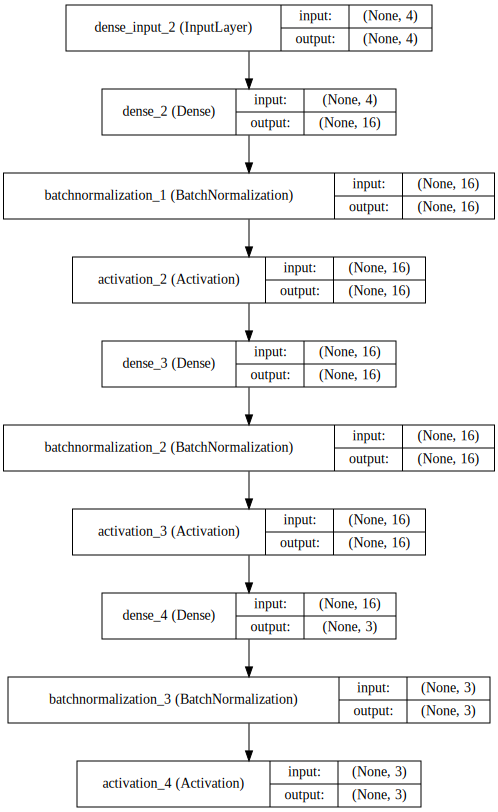

In [16]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))